In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
with open("data/yelp_cats_boston.csv") as f:
    bos_df = pd.read_csv(f)
with open("data/Yelp-Pittsburgh.m.csv") as f:
    pits_df = pd.read_csv(f)

In [3]:
df = bos_df

In [4]:
df.describe()

,review_count,rating,nlatitude,nlongitude,latitude,longitude
count,343.000000,343.000000,266.000000,266.000000,343.000000,343.000000
mean,243.192420,4.155977,42.352467,28.929163,42.354902,28.925954
std,340.450292,0.310184,0.016630,0.026357,0.022181,0.032851
min,6.000000,3.500000,42.279755,28.837324,42.243252,28.773414
25%,60.000000,4.000000,42.350064,28.919024,42.348277,28.911270
50%,121.000000,4.000000,42.353904,28.937595,42.352104,28.937318
75%,308.000000,4.500000,42.360083,28.945766,42.363778,28.944697
max,3519.000000,5.000000,42.401117,28.961140,42.453082,29.012090


In [5]:
print(df.columns)

Index(['name', 'image_url', 'url', 'review_count', 'categories', 'rating',
       'snippet_text', 'location', 'neighborhood', 'nlatitude', 'nlongitude',
       'latitude', 'longitude', 'search category'],
      dtype='object')


In [7]:
df["snippet_text"][0]

"After going to Wheelhouse, you'll never order a Dunkin Donuts' breakfast sandwich ever again. Well, you might, but you won't enjoy it.\n\nThis place has the..."

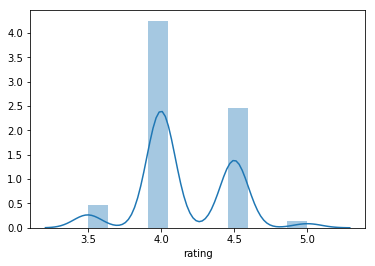

In [8]:
sns.distplot(df['rating'])

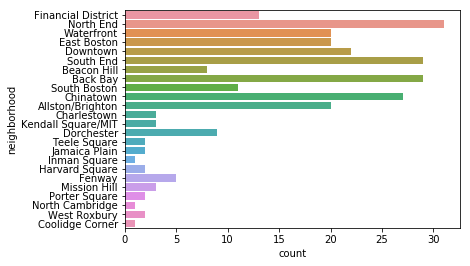

In [9]:
sns.countplot(y = df['neighborhood'])

0    [[Breakfast & Brunch, breakfast_brunch], [Burg...
1                                 [[Mexican, mexican]]
2                               [[Japanese, japanese]]
3                 [[Italian, italian], [Pizza, pizza]]
4      [[Seafood, seafood], [Live/Raw Food, raw_food]]
5                      [[American (New), newamerican]]
6    [[Mediterranean, mediterranean], [Vegan, vegan...
7    [[Spanish, spanish], [Wine Bars, wine_bars], [...
8    [[Pizza, pizza], [Salad, salad], [Sandwiches, ...
9                 [[Italian, italian], [Pizza, pizza]]
Name: cat_list, dtype: object


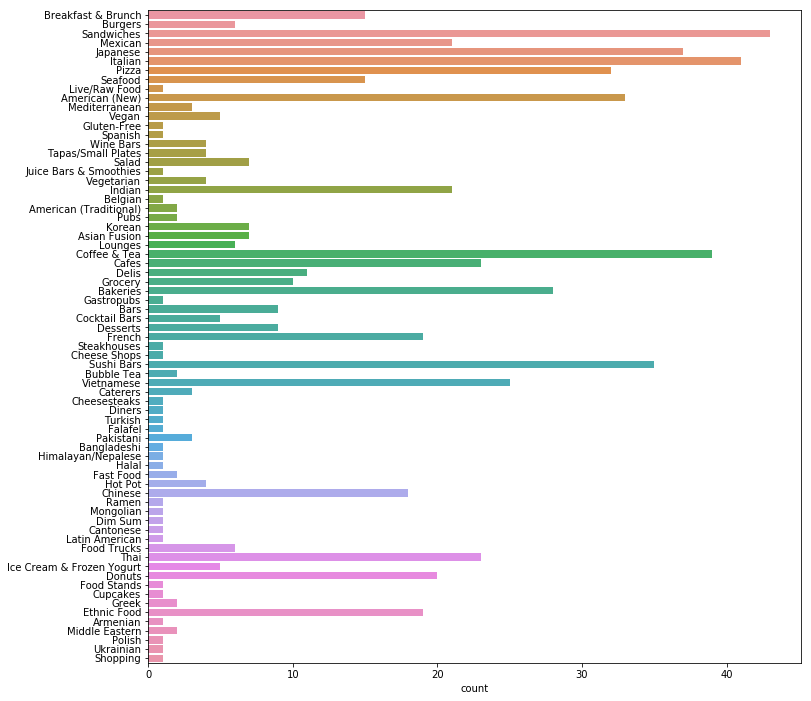

In [14]:
# BOSTON only
import ast
df["cat_list"] = bos_df["categories"].apply(lambda x: ast.literal_eval(x))
print(bos_df["cat_list"][:10])
all_cats = []
for d in bos_df["cat_list"]:
    all_cats.extend(d)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 12)
sns.countplot(y = list(map(lambda x: x[0], all_cats)))

In [15]:
# PITSBURGH only
# sns.countplot(y = df['type'])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
len(df["neighborhood"].value_counts())

24

In [23]:
with open("data/boston.geojson") as f:
    geodata = json.load(f)

In [27]:
validNeighborhoods = list(map(lambda x: x["properties"]["name"], geodata["features"]))

In [28]:
validNeighborhoods

['Roslindale',
 'Jamaica Plain',
 'Leather District',
 'Roxbury',
 'Fenway',
 'Brighton',
 'West Roxbury',
 'Hyde Park',
 'South End',
 'Back Bay',
 'East Boston',
 'Charlestown',
 'Downtown',
 'Mission Hill',
 'Bay Village',
 'Longwood Medical Area',
 'Chinatown',
 'North End',
 'West End',
 'Beacon Hill',
 'Mattapan',
 'Dorchester',
 'South Boston Waterfront',
 'South Boston',
 'Allston',
 'Harbor Islands']

In [36]:
dfnbhds = list(df["neighborhood"].value_counts().keys())

In [39]:
inters = [i for i in dfnbhds if i in validNeighborhoods]
diff1 = [i for i in dfnbhds if i not in validNeighborhoods]
diff2 = [i for i in validNeighborhoods if i not in dfnbhds]

In [40]:
inters

['North End',
 'South End',
 'Back Bay',
 'Chinatown',
 'Downtown',
 'East Boston',
 'South Boston',
 'Dorchester',
 'Beacon Hill',
 'Fenway',
 'Mission Hill',
 'Charlestown',
 'West Roxbury',
 'Jamaica Plain']

In [41]:
diff1

['Waterfront',
 'Allston/Brighton',
 'Financial District',
 'Kendall Square/MIT',
 'Teele Square',
 'Harvard Square',
 'Porter Square',
 'Coolidge Corner',
 'Inman Square',
 'North Cambridge']

In [42]:
diff2

['Roslindale',
 'Leather District',
 'Roxbury',
 'Brighton',
 'Hyde Park',
 'Bay Village',
 'Longwood Medical Area',
 'West End',
 'Mattapan',
 'South Boston Waterfront',
 'Allston',
 'Harbor Islands']